# How do Radiation Biases Improve When Decreasing the Resolution?

The biases in simulated radiation fluxes are decomposed into different components coming from clearsky and CREs.

For the net flux, we have

$$
\delta \overline{F_\mathrm{net}} = 
    \delta \overline{F_{\mathrm{net, clear}}} - 
    \delta \mathrm{CRE_{net}}\,.
$$

where $\delta$ denotes the bias, i.e. the difference between simulations and observations.

In [319]:
%matplotlib inline

import os, sys, copy, glob
import numpy as np
import datetime
import pylab as pl
import xarray as xr
import pandas as pd
import string
import seaborn as sns


In [320]:
from nawdex_analysis.config import nawdex_dir
import nawdex_analysis.io.collector

In [321]:
from  nawdex_analysis.plot.stacked_analysis_plots import hor_barplot_exp_plot
from nawdex_analysis.plot.legend import plegend
import nawdex_analysis.analysis.ave_cre

In [322]:
pl.rcParams['figure.figsize'] = (16.0, 8.0)
pl.rcParams['font.size'] = 18.0
pl.rcParams['lines.linewidth'] = 3


## Read Data

In [323]:
fdir = '%s/statistics' % nawdex_dir
fname = '%s/radflux_decomposition_set2.nc' % fdir

dset = xr.open_dataset( fname )

## Average Biases 

In [324]:
aveset = dset.sum('ct')
aveset

<xarray.Dataset>
Dimensions:    (component: 6, idname: 22)
Coordinates:
  * idname     (idname) |S18 '10km_oneMom_Conv' ... 'msevi-scaled'
  * component  (component) |S19 'ave_bias' 'cloud_fraction_term' ... 'cre_bias'
Data variables:
    net        (component, idname) float64 7.698 27.67 9.385 ... -6.702 0.0
    longwave   (component, idname) float64 8.215 5.312 9.693 ... -2.009 0.0
    shortwave  (component, idname) float64 -0.5171 22.35 -0.308 ... -4.693 0.0

## Reshape Bias Data for Plotting

In [325]:
dlist = []
vlist = ['net', 'shortwave', 'longwave']

for vname in vlist:
    d = aveset[vname].expand_dims('var')
    d['var'] = [ vname, ]
    
    dlist += [ d.copy(), ]
dvar = xr.concat( dlist, dim = 'var')
#.rename({'net' : 'biases'})

In [329]:
dcomb = xr.Dataset()
dcomb['abs_bias'] = dvar

dcomb.sel(var = 'net')

<xarray.Dataset>
Dimensions:    (component: 6, idname: 22)
Coordinates:
  * idname     (idname) |S18 '10km_oneMom_Conv' ... 'msevi-scaled'
  * component  (component) |S19 'ave_bias' 'cloud_fraction_term' ... 'cre_bias'
    var        |S3 'net'
Data variables:
    abs_bias   (component, idname) float64 7.698 27.67 9.385 ... -6.702 0.0

In [327]:
dcomb.component.data

array(['ave_bias', 'cloud_fraction_term', 'radflux_term', 'cross_term',
       'clear_bias', 'cre_bias'], dtype='|S19')

In [328]:
vlist = ['net', 'shortwave', 'longwave']
complist = ['ave_bias', 'cloud_fraction_term', 'radflux_term', 'cross_term',
       'clear_bias', 'cre_bias']

idlist = list ( dcomb.idname.data )
idlist.remove('msevi-scaled')
idlist.remove('msevi-not_scaled')


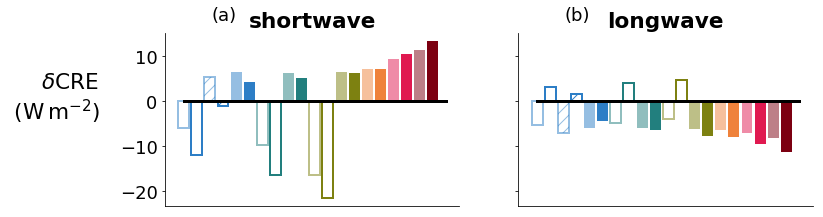

In [331]:
complist = ['cre_bias']
ylabs = ['$\delta \mathrm{CRE}$ \n $(\mathrm{W\,m^{-2}})$']
vlist = [ 'shortwave', 'longwave']


fig, ax = pl.subplots( nrows = 1, ncols = 2, figsize = (18,4), sharex = True, sharey = True )
pl.subplots_adjust( left = 0.3, bottom = 0.2, right = 0.8, top = 0.8 )
ax = np.array([ax,])

abc = string.ascii_lowercase

n = 0
for i, compname in enumerate( complist ):
    for j, vname in enumerate( vlist ):
        pl.sca( ax[i,j] )
        
        # we switch sign because - delta CRE appears in the flux decomposition !!!
        hor_barplot_exp_plot( -dcomb.sel(var = vname), 'abs_bias', catlist = [compname, ], 
                      icount0 = 0,  idlist = idlist, 
                      iddim='idname', catdim = 'component', 
                      obsref_name='msevi-scaled', doffset=0.05, offset0=-0.4, make_labels=True)
        
        xlim = pl.xlim()
        
        pl.text( (0.2* xlim[1] + 0.8* xlim[0]) , 19, '(%s)' % abc[n], va = 'center', ha = 'center')
        pl.xticks([])
        
        n += 1
        
    

for j, vname in enumerate( vlist ):
    pl.sca( ax[0, j])
    pl.title('%s' % vname, fontweight = 'bold')
    
for i, compname in enumerate( complist ):
    a = ax[i, 0]
    pl.sca( a )
    
    apos = a.get_position()
    pl.figtext(apos.x0 - 0.05, apos.y0 + apos.height / 2., ylabs[i],
                ha = 'right', fontsize = 'large')

    
## dummy items

# pl.bar([0], [0], color='w', alpha=0, label=' ', zorder = 10)

#plegend(loc = 'lower center', ncol = 3, bbox_to_anchor = (1., -1.4), fontsize = 'medium' )

sns.despine()
pl.savefig('../pics/cre-bias-set2.png', dpi = 300)

## Print again only for the Legend

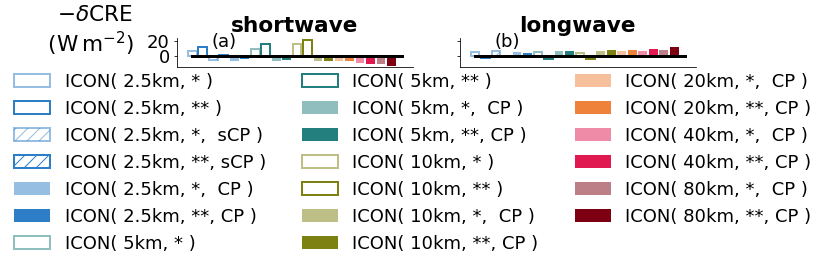

In [306]:
complist = ['cre_bias']
ylabs = ['$-\delta \mathrm{CRE}$ \n $(\mathrm{W\,m^{-2}})$']
vlist = [ 'shortwave', 'longwave']


fig, ax = pl.subplots( nrows = 1, ncols = 2, figsize = (12,4), sharex = True, sharey = True )
pl.subplots_adjust( left = 0.2, bottom = 0.7, right = 0.8, top = 0.8 )
ax = np.array([ax,])

abc = string.ascii_lowercase

n = 0
for i, compname in enumerate( complist ):
    for j, vname in enumerate( vlist ):
        pl.sca( ax[i,j] )
        hor_barplot_exp_plot( dcomb.sel(var = vname), 'abs_bias', catlist = [compname, ], 
                      icount0 = 0,  idlist = idlist, 
                      iddim='idname', catdim = 'component', 
                      obsref_name='msevi-scaled', doffset=0.05, offset0=-0.4, make_labels=True)
        
        xlim = pl.xlim()
        
        pl.text( (0.2* xlim[1] + 0.8* xlim[0]) , 19, '(%s)' % abc[n], va = 'center', ha = 'center')
        pl.xticks([])
        
        n += 1
        
    

for j, vname in enumerate( vlist ):
    pl.sca( ax[0, j])
    pl.title('%s' % vname, fontweight = 'bold')
    
for i, compname in enumerate( complist ):
    a = ax[i, 0]
    pl.sca( a )
    
    apos = a.get_position()
    pl.figtext(apos.x0 - 0.05, apos.y0 + apos.height / 2., ylabs[i],
                ha = 'right', fontsize = 'large')

    
## dummy items

# pl.bar([0], [0], color='w', alpha=0, label=' ', zorder = 10)

plegend(loc = 'lower center', ncol = 3, bbox_to_anchor = (1., -7), fontsize = 'medium' )

sns.despine()
pl.savefig('../pics/cre-bias-set2-4legend.png', dpi = 300)

In [307]:
dcomb.idname.data

array(['10km_oneMom_Conv', '10km_oneMom_noConv', '10km_twoMom_Conv',
       '10km_twoMom_noConv', '20km_oneMom_Conv', '20km_twoMom_Conv',
       '2km_oneMom_Conv', '2km_oneMom_noConv', '2km_oneMom_shConv',
       '2km_twoMom_Conv', '2km_twoMom_noConv', '2km_twoMom_shConv',
       '40km_oneMom_Conv', '40km_twoMom_Conv', '5km_oneMom_Conv',
       '5km_oneMom_noConv', '5km_twoMom_Conv', '5km_twoMom_noConv',
       '80km_oneMom_Conv', '80km_twoMom_Conv', 'msevi-not_scaled',
       'msevi-scaled'], dtype='|S18')

In [308]:
idlist = ['10km_oneMom_Conv', '10km_twoMom_Conv', '20km_oneMom_Conv',
       '20km_twoMom_Conv', '40km_oneMom_Conv',
       '40km_twoMom_Conv', '5km_oneMom_Conv', '5km_twoMom_Conv',]

idlist = ['10km_oneMom_Conv', '10km_twoMom_Conv',
          '20km_oneMom_Conv', '20km_twoMom_Conv',
           '2km_oneMom_Conv', '2km_oneMom_noConv', 
           '2km_twoMom_Conv', '2km_twoMom_noConv', 
           '40km_oneMom_Conv', '40km_twoMom_Conv', '5km_oneMom_Conv',
           '5km_oneMom_noConv', '5km_twoMom_Conv', '5km_twoMom_noConv',
           ]

# dcomb = dcomb.sel( idname = idlist )

## Absolute Changes in BIAS - Resolution Dependence

In [309]:
twin_map = {'2km':'5km',
            '5km': '10km', 
            '10km': '20km', 
            '20km': '40km', 
            '40km': '80km'}

diff_list = [dcomb.sel( idname = ['msevi-scaled', ])]
for idname in idlist:
    d = dcomb.sel( idname = idname )
    
    res = idname.split('_')[0]
    twinname = idname.replace(res, twin_map[res] )
    twin = dcomb.sel( idname = twinname )
    
    # m = np.abs( d ) < np.abs( twin )
    #sign = xr.ones_like( d ).where( m, -1 )   
    #diff = sign * np.abs(d - twin)
    
    diff = np.abs(twin) - np.abs(d)
    diff = diff.expand_dims('idname')
    diff['idname'] = [idname, ]
    
    diff_list += [ diff, ]
    
dcomb_res = xr.merge( diff_list )


In [310]:
dcomb_res

<xarray.Dataset>
Dimensions:    (component: 6, idname: 15, var: 3)
Coordinates:
  * idname     (idname) object '10km_oneMom_Conv' ... 'msevi-scaled'
  * component  (component) |S19 'ave_bias' 'cloud_fraction_term' ... 'cre_bias'
  * var        (var) object 'net' 'shortwave' 'longwave'
Data variables:
    abs_bias   (var, component, idname) float64 -0.5896 -0.7998 ... 0.7408 0.0

### Plot the Bias Decomposition Matrix

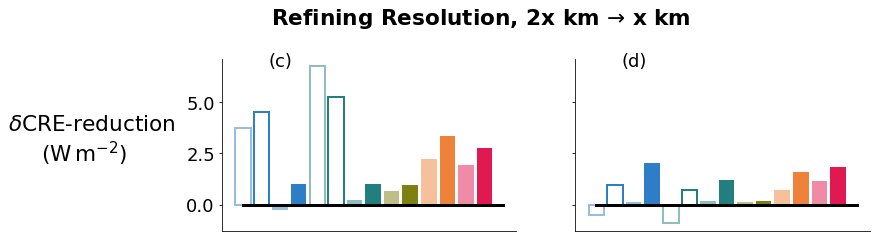

In [311]:
complist = ['cre_bias']
ylabs = ['$\delta \mathrm{CRE}$-reduction\n     $(\mathrm{W\,m^{-2}})$        ']

fig, ax = pl.subplots( nrows = 1, ncols = 2, figsize = (18,4), sharex = True, sharey = True )
pl.subplots_adjust( left = 0.3, bottom = 0.2, right = 0.8, top = 0.8 )
ax = np.array( [ax,] )
abc = string.ascii_lowercase

n = 0
for i, compname in enumerate( complist ):
    for j, vname in enumerate( vlist ):
        pl.sca( ax[i,j] )
        hor_barplot_exp_plot( dcomb_res.sel(var = vname), 'abs_bias', catlist = [compname, ], 
                      icount0 = 0,  idlist = idlist, 
                      iddim='idname', catdim = 'component', 
                      obsref_name='msevi-scaled', doffset=0.05, offset0=-0.2, make_labels=True)
        
        xlim = pl.xlim()
        
        pl.text( (0.2*xlim[1] + 0.8*xlim[0]) , 7, '(%s)' % abc[n+2], va = 'center', ha = 'center')
        pl.xticks([])
        
        n += 1
        
    

for j, vname in enumerate( vlist ):
    pl.sca( ax[0, j])
#    pl.title('%s' % vname, fontweight = 'bold', pad = 30)
    
for i, compname in enumerate( complist ):
    a = ax[i, 0]
    pl.sca( a )
    
    apos = a.get_position()
    pl.figtext(apos.x0 - 0.1, apos.y0 + 0.4*apos.height, ylabs[i], 
                ha = 'center', fontsize = 'large')

pl.suptitle(r'Refining Resolution, 2x km $\to$ x km', fontsize = 'large', fontweight = 'bold')
## dummy items


#plegend(loc = 'lower center', ncol = 4, bbox_to_anchor = (1.6, -0.7), fontsize = 'medium' )

sns.despine()
pl.savefig('../pics/cre-bias-reduction-res.png', dpi = 300)

## Absolute Changes in BIAS - Microphysics Dependence

In [312]:
twomom_list = []

for idname in dcomb.idname.data:
    if 'twoMom' in idname:
        twomom_list += [idname, ]

In [313]:
idlist = twomom_list
idlist

['10km_twoMom_Conv',
 '10km_twoMom_noConv',
 '20km_twoMom_Conv',
 '2km_twoMom_Conv',
 '2km_twoMom_noConv',
 '2km_twoMom_shConv',
 '40km_twoMom_Conv',
 '5km_twoMom_Conv',
 '5km_twoMom_noConv',
 '80km_twoMom_Conv']

In [314]:
twin_map = {'twoMom':'oneMom',}

diff_list = [dcomb.sel( idname = ['msevi-scaled', ])]
for idname in idlist:
    d = dcomb.sel( idname = idname )
    
    mu = idname.split('_')[1]
    twinname = idname.replace(mu, twin_map[mu] )
    twin = dcomb.sel( idname = twinname )
    
#    m = np.abs( d ) < np.abs( twin )
#    sign = xr.ones_like( d ).where( m, -1 )
#    diff = sign * np.abs(d - twin)
 
    diff = np.abs( twin) - np.abs( d )
    diff = diff.expand_dims('idname')
    diff['idname'] = [idname, ]
    
    diff_list += [ diff, ]
    
dcomb_mu = xr.merge( diff_list )


In [315]:
dcomb_mu

<xarray.Dataset>
Dimensions:    (component: 6, idname: 11, var: 3)
Coordinates:
  * idname     (idname) object '10km_twoMom_Conv' ... 'msevi-scaled'
  * component  (component) |S19 'ave_bias' 'cloud_fraction_term' ... 'cre_bias'
  * var        (var) object 'net' 'shortwave' 'longwave'
Data variables:
    abs_bias   (var, component, idname) float64 -1.688 3.452 ... -3.101 0.0

### Plot the Bias Decomposition Matrix

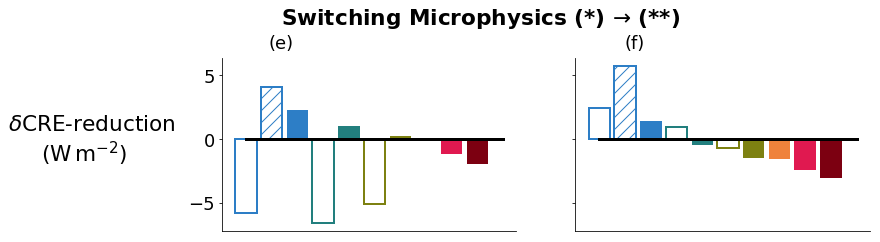

In [316]:
complist = ['cre_bias']
ylabs = ['$\delta \mathrm{CRE}$-reduction\n     $(\mathrm{W\,m^{-2}})$        ']

fig, ax = pl.subplots( nrows = 1, ncols = 2, figsize = (18,4), sharex = True, sharey = True )
pl.subplots_adjust( left = 0.3, bottom = 0.2, right = 0.8, top = 0.8 )
ax = np.array( [ax,] )
abc = string.ascii_lowercase

n = 0
for i, compname in enumerate( complist ):
    for j, vname in enumerate( vlist ):
        pl.sca( ax[i,j] )
        hor_barplot_exp_plot( dcomb_mu.sel(var = vname), 'abs_bias', catlist = [compname, ], 
                      icount0 = 0,  idlist = idlist, 
                      iddim='idname', catdim = 'component', 
                      obsref_name='msevi-scaled', doffset=0.05, offset0=-0.2, make_labels=True)
        
        xlim = pl.xlim()
        
        pl.text( (0.2*xlim[1] + 0.8*xlim[0]) , 7.5, '(%s)' % abc[n+4], va = 'center', ha = 'center')
        pl.xticks([])
        
        n += 1
        
    

for j, vname in enumerate( vlist ):
    pl.sca( ax[0, j])
#    pl.title('%s' % vname, fontweight = 'bold', pad = 30)
    
for i, compname in enumerate( complist ):
    a = ax[i, 0]
    pl.sca( a )
    
    apos = a.get_position()
    pl.figtext(apos.x0 - 0.1, apos.y0 + 0.4*apos.height, ylabs[i], 
                ha = 'center', fontsize = 'large')

pl.suptitle(r'Switching Microphysics (*) $\to$ (**)', fontsize = 'large', fontweight = 'bold')
## dummy items


#plegend(loc = 'lower center', ncol = 4, bbox_to_anchor = (1.6, -0.7), fontsize = 'medium' )

sns.despine()
pl.savefig('../pics/cre-bias-reduction-mu.png', dpi = 300)
# pl.savefig('../pics/rad-bias-decomposition.png', pdi = 300)